In [1]:
from utils import generate_hotel_dfs, model_cancellations
import pandas as pd
import numpy as np

In [2]:
pd.options.display.max_rows = 60
pd.options.display.max_columns = 70

In [3]:
# h1_res, h1_dbd = generate_hotel_dfs("../data/H1.csv")
# h2_res, h2_dbd = generate_hotel_dfs("../data/H2.csv")

In [5]:
# h1_res.to_pickle("pickle/h1_res.pick")
# h1_dbd.to_pickle("pickle/h1_dbd.pick")
# h2_res.to_pickle("pickle/h2_res.pick")
# h2_dbd.to_pickle("pickle/h2_dbd.pick")

In [6]:
h1_res = pd.read_pickle("pickle/h1_res.pick")
h2_res = pd.read_pickle("pickle/h2_res.pick")
h1_dbd = pd.read_pickle("pickle/h1_dbd.pick")
h2_dbd = pd.read_pickle("pickle/h2_dbd.pick")

Training sample size: 38295
Testing sample Size: 1765




findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


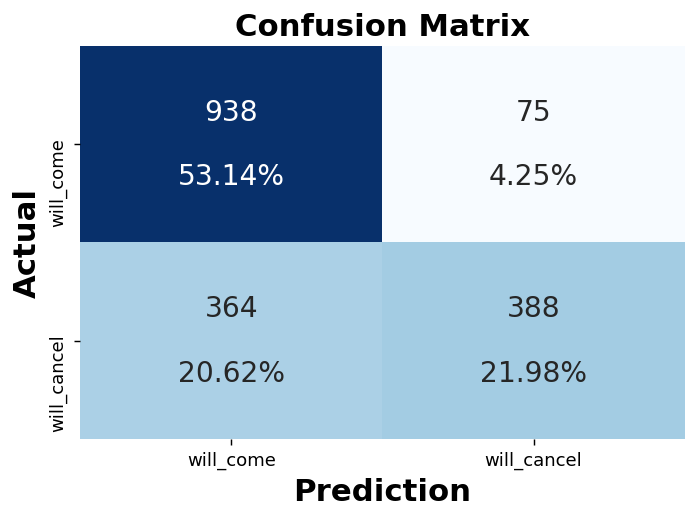

Optimal probability threshold (to maximize F-0.5): 0.6
F-0.5 Score: 0.745



In [7]:
h1_res_preds = model_cancellations(h1_res, "2017-08-01", 1)


In [8]:
h1_res_preds.will_cancel.value_counts()

Series([], Name: will_cancel, dtype: int64)

In [9]:
h1_res_preds.shape

(1765, 37)

In [10]:
mask = h1_res_preds.will_cancel.isna()
h1_res_preds[mask]

,LeadTime,LOS,StaysInWeekendNights,StaysInWeekNights,ADR,NumPeople,Adults,Children,Babies,TotalOfSpecialRequests,PreviousBookings,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,RequiredCarParkingSpaces,IsRepeatedGuest,AgencyBooking,CompanyListed,CT_is_grp,CT_is_trn,CT_is_trnP,RS_No-Show,MS_Corporate,MS_Direct,MS_Groups,MS_Offline TA/TO,MS_Online TA,DC_Direct,DC_TA/TO,DC_Undefined,DT_NonRefundable,DT_Refundable,MEAL_Undefined,MEAL_HB,MEAL_FB,will_cancel
12815,240,16,5,11,183.05,2,2,0,0,0,0,0,0,0,0,0,0,True,False,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,NaN
12816,236,16,5,11,182.92,2,2,0,0,0,0,0,0,0,0,0,0,True,False,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,NaN
12859,202,14,4,10,158.63,3,2,1,0,0,0,0,0,0,0,0,0,True,False,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,NaN
12874,200,15,4,11,172.20,2,2,0,0,1,0,0,0,0,0,0,0,True,False,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,NaN
12911,163,14,4,10,180.00,2,2,0,0,2,0,0,0,0,0,0,0,True,False,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,212,10,2,8,89.75,3,2,1,0,0,0,0,0,1,0,0,0,True,False,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,NaN
40056,169,11,2,9,202.27,2,2,0,0,1,0,0,0,0,0,0,0,True,False,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,NaN
40057,204,14,4,10,153.57,2,2,0,0,3,0,0,0,0,0,0,0,True,False,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,NaN
40058,211,14,4,10,112.80,2,2,0,0,1,0,0,0,0,0,0,0,True,False,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,NaN


Training sample size: 76320
Testing sample Size: 3010




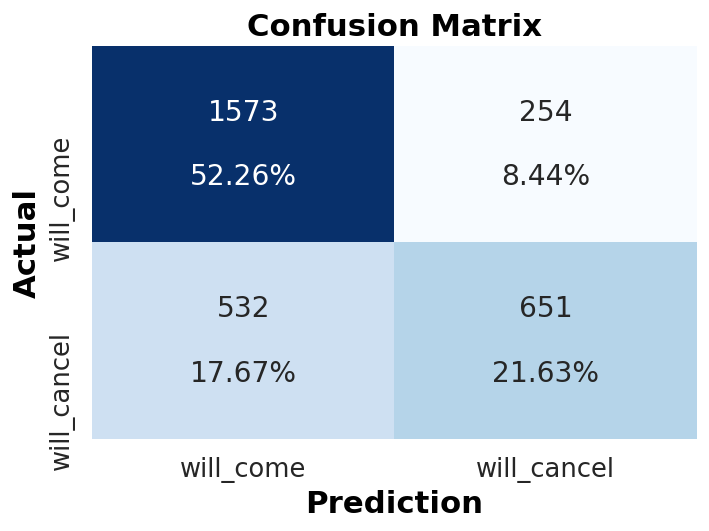

Optimal probability threshold (to maximize F-0.5): 0.584
F-0.5 Score: 0.678



In [11]:
h2_res_preds = model_cancellations(h2_res, "2017-08-01", 2)


In [12]:
h2

NameError: name 'h2' is not defined